#### 1. Import necessary packages

In [54]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data_file_path = "Financial_inclusion_dataset.csv"

# Load data
data = pd.read_csv(data_file_path)

#### Data exploration

In [55]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [57]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [58]:
print(data.nunique())  # Check unique values for each column

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64


In [59]:
print(f"Shape of the dataset: {data.shape}")
print(data.dtypes)

Shape of the dataset: (23524, 13)
country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


#### Data Cleaning

In [60]:
# percentage of missing values
print(data.isnull().sum() / data.shape[0] * 100)

country                   0.0
year                      0.0
uniqueid                  0.0
bank_account              0.0
location_type             0.0
cellphone_access          0.0
household_size            0.0
age_of_respondent         0.0
gender_of_respondent      0.0
relationship_with_head    0.0
marital_status            0.0
education_level           0.0
job_type                  0.0
dtype: float64


In [61]:
# Check for duplicates
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  0


No missing values! No duplicates!

#### Data Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_91616\3272799473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='bank_account', palette='pastel')


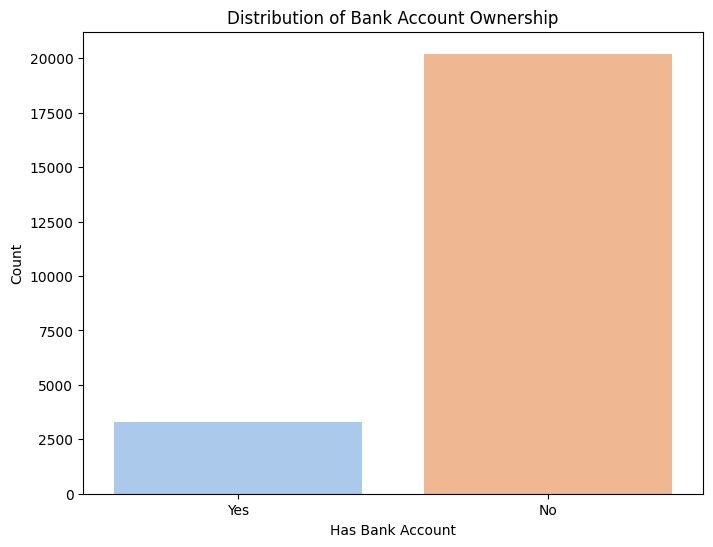

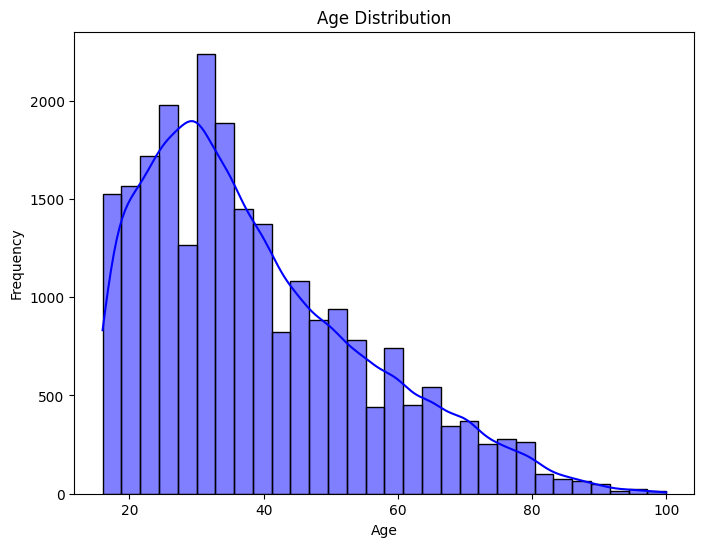

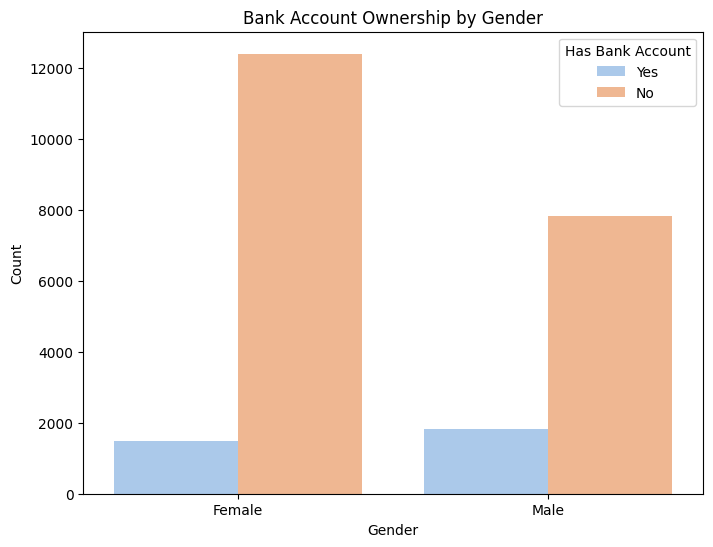

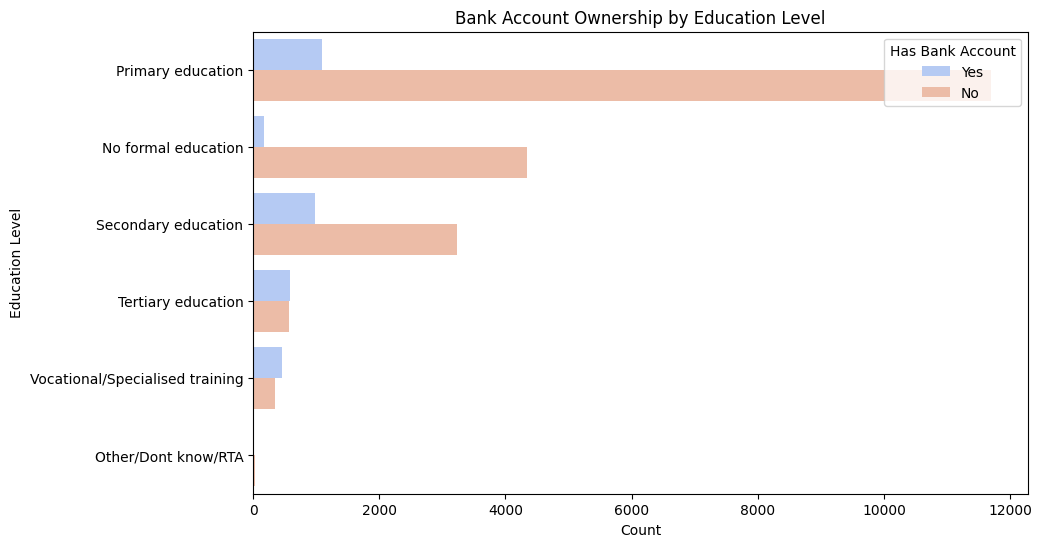

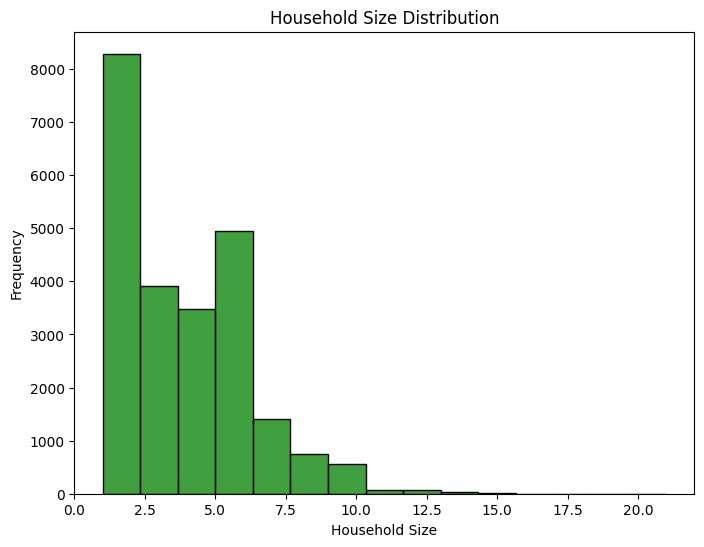

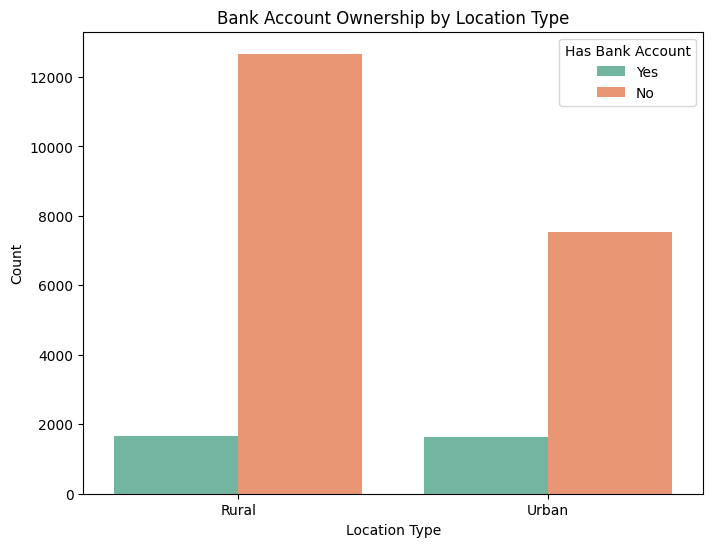

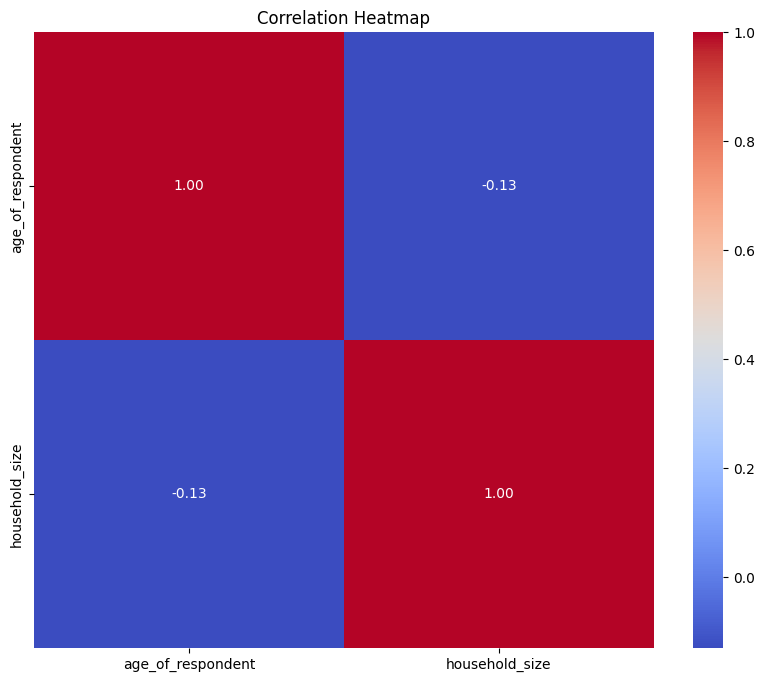


Insights:
Bank Account Ownership Rates:
bank_account
No     0.859208
Yes    0.140792
Name: proportion, dtype: float64

Gender Distribution:
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

Education Level Distribution:
education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64


In [62]:
# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='bank_account', palette='pastel')
plt.title('Distribution of Bank Account Ownership')
plt.xlabel('Has Bank Account')
plt.ylabel('Count')
plt.show()

# 2. Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age_of_respondent'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Bank account ownership by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender_of_respondent', hue='bank_account', palette='pastel')
plt.title('Bank Account Ownership by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Has Bank Account', loc='upper right')
plt.show()

# 4. Bank account ownership by education level
plt.figure(figsize=(10, 6))
education_order = data['education_level'].value_counts().index
sns.countplot(data=data, y='education_level', hue='bank_account', order=education_order, palette='coolwarm')
plt.title('Bank Account Ownership by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Has Bank Account', loc='upper right')
plt.show()

# 5. Household size distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['household_size'], bins=15, kde=False, color='green')
plt.title('Household Size Distribution')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.show()

# 6. Bank account ownership by location type
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='location_type', hue='bank_account', palette='Set2')
plt.title('Bank Account Ownership by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Has Bank Account', loc='upper right')
plt.show()

# 7. Correlation heatmap (numerical variables)
plt.figure(figsize=(10, 8))
numerical_columns = ['age_of_respondent', 'household_size']
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# -----------------------------------------------------------------
# Insights
# -----------------------------------------------------------------

print("\nInsights:")
# Bank account ownership rates
ownership_rate = data['bank_account'].value_counts(normalize=True)
print(f"Bank Account Ownership Rates:\n{ownership_rate}")

# Gender distribution
gender_dist = data['gender_of_respondent'].value_counts()
print(f"\nGender Distribution:\n{gender_dist}")

# Education levels
education_dist = data['education_level'].value_counts()
print(f"\nEducation Level Distribution:\n{education_dist}")

#### Data Transformation

In [63]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns

# Handle outliers for numerical columns using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))



data.drop(['uniqueid'], axis=1, inplace=True) # Drop user_id column first to reduce memory overhead

# Encode categorical variables using one-hot encoding
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

#### Data Modeling

Achieving 100% accuracy most likely means the model is overfitting which results in poor generalization.

In [78]:
# Select the features again
from sklearn.model_selection import cross_val_score

#country	year	uniqueid	bank_account	location_type	cellphone_access	household_size	age_of_respondent	gender_of_respondent	relationship_with_head	marital_status	education_level	job_type

X = data[["gender_of_respondent", "age_of_respondent", "education_level","job_type"]]

y = data["bank_account"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # You can change cv to your preferred number of folds

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")


# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.84484591 0.87481403 0.86971307 0.8544102  0.8650085 ]
Mean accuracy: 0.8617583425506229
Accuracy: 0.8709266081042788
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      6073
           1       0.57      0.30      0.40       985

    accuracy                           0.87      7058
   macro avg       0.73      0.63      0.66      7058
weighted avg       0.85      0.87      0.85      7058



#### Save the trained models artifact

In [76]:
# Save the model artifact using pickle
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [75]:
# output the first entry of the test data
X_test.head(1).to_csv("test_data.csv", index=False)